In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('NationalNames.csv')
data.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [5]:
data.shape

(1825433, 5)

In [6]:
data['Name'].nunique()

93889

## Encoding with 1 and 0 s respectively 

In [7]:
data['Gender'] = data['Gender'].astype('category').cat.codes

In [8]:
data.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,0,7065
1,2,Anna,1880,0,2604
2,3,Emma,1880,0,2003
3,4,Elizabeth,1880,0,1939
4,5,Minnie,1880,0,1746


In [9]:
df = data.groupby('Name').mean()['Gender'].reset_index()
df

,Name,Gender
0,Aaban,1.0
1,Aabha,0.0
2,Aabid,1.0
3,Aabriella,0.0
4,Aadam,1.0
...,...,...
93884,Zytavious,1.0
93885,Zyvion,1.0
93886,Zyyanna,0.0
93887,Zyyon,1.0


In [10]:
df.isna().sum()

Name      0
Gender    0
dtype: int64

In [11]:
df['Gender'] = df['Gender'].astype('int')
df.head()

,Name,Gender
0,Aaban,1
1,Aabha,0
2,Aabid,1
3,Aabriella,0
4,Aadam,1


In [12]:
import string

In [13]:
letters = list(string.ascii_lowercase)
letters

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [14]:
vocab = dict(zip(letters , range(1,27)))
vocab

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [15]:
r_vocab = dict(zip(range(1,27) , letters))
r_vocab
r_vocab = vocab
vocab

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [1]:
vocab = {chr(i + 96): i for i in range(1, 27)}

In [16]:
df['Name_num'] = df['Name'].astype(str).apply(
    lambda word: [vocab[ch] for ch in word.lower()[:3] if ch in vocab]
)

In [17]:
MAX_LEN = 5
PAD = 0

df['Name_num'] = df['Name'].astype(str).apply(
    lambda word: (
        [vocab.get(ch, 0) for ch in word.lower()[:MAX_LEN]] +
        [PAD] * MAX_LEN
    )[:MAX_LEN]
)


In [18]:
df.head()

,Name,Gender,Name_num
0,Aaban,1,"[1, 1, 2, 1, 14]"
1,Aabha,0,"[1, 1, 2, 8, 1]"
2,Aabid,1,"[1, 1, 2, 9, 4]"
3,Aabriella,0,"[1, 1, 2, 18, 9]"
4,Aadam,1,"[1, 1, 4, 1, 13]"


In [20]:
df.drop(columns=['Name'], inplace=True)

In [21]:
df.head()

,Gender,Name_num
0,1,"[1, 1, 2, 1, 14]"
1,0,"[1, 1, 2, 8, 1]"
2,1,"[1, 1, 2, 9, 4]"
3,0,"[1, 1, 2, 18, 9]"
4,1,"[1, 1, 4, 1, 13]"


In [30]:
df['Name'] = df['Name_num']     
df = df[['Name_num', 'Gender']]  # Used to interchange column values 

In [31]:
df.head()

,Name_num,Gender
0,"[1, 1, 2, 1, 14]",1
1,"[1, 1, 2, 8, 1]",0
2,"[1, 1, 2, 9, 4]",1
3,"[1, 1, 2, 18, 9]",0
4,"[1, 1, 4, 1, 13]",1


In [34]:
X = df['Name_num'].values
y = df['Gender'].values

In [35]:
name_length = [len(X[i]) for i in range (0 , df.shape[0])]

In [36]:
name_length

[5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,


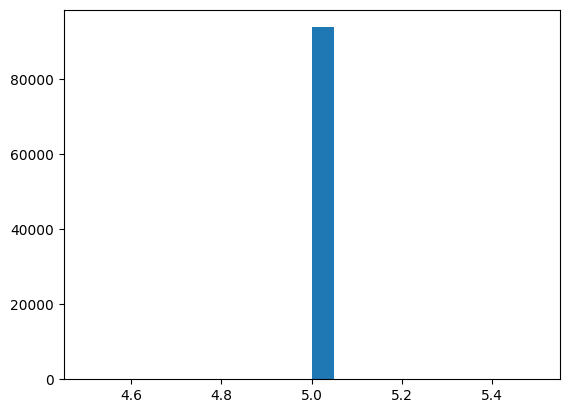

In [37]:
plt.hist(name_length, bins =20)
plt.show()

In [38]:
from keras.preprocessing.sequence import pad_sequences

In [40]:
x = pad_sequences(df['Name_num'].values , maxlen = 10 , padding = 'pre')

In [41]:
x

array([[ 0,  0,  0, ...,  2,  1, 14],
       [ 0,  0,  0, ...,  2,  8,  1],
       [ 0,  0,  0, ...,  2,  9,  4],
       ...,
       [ 0,  0,  0, ..., 25,  1, 14],
       [ 0,  0,  0, ..., 25, 15, 14],
       [ 0,  0,  0, ..., 25, 26, 24]], shape=(93889, 10), dtype=int32)

In [42]:
from keras.layers import Input,Embedding ,Dense,LSTM
from keras.models import Model

In [44]:
vocab_size = len(vocab)+1
vocab_size

27

In [46]:
inp = Input(shape=(10,))
emn = Embedding(input_dim = vocab_size, output_dim=5)(inp)

lstm1 = LSTM(units= 32 , return_sequences=True)(emn)
lstm2 = LSTM(units=64)(lstm1)

out = Dense(units=1 , activation='sigmoid')(lstm2)

my_model = Model(inputs = inp , outputs = out)

In [48]:
my_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 10, 5)               │             135 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 10, 32)              │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,896 (116.78 KB)

 Trainable params: 29,896 (116.78 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
my_model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics =['acc'])

In [61]:
his = my_model.fit(x,y,epochs=30 , batch_size = 256 , validation_split = 0.3)

Epoch 1/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - acc: 0.7226 - loss: 0.5521 - val_acc: 0.6950 - val_loss: 0.5847
Epoch 2/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - acc: 0.7242 - loss: 0.5499 - val_acc: 0.6938 - val_loss: 0.5876
Epoch 3/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - acc: 0.7247 - loss: 0.5480 - val_acc: 0.6925 - val_loss: 0.5883
Epoch 4/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - acc: 0.7283 - loss: 0.5459 - val_acc: 0.6967 - val_loss: 0.5892
Epoch 5/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 17s 64ms/step - acc: 0.7291 - loss: 0.5440 - val_acc: 0.6941 - val_loss: 0.5911
Epoch 6/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 17s 64ms/step - acc: 0.7309 - loss: 0.5423 - val_acc: 0.6866 - val_loss: 0.5979
Epoch 7/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - acc: 0.7325 - loss: 0.5400 - val_acc: 0.6897 - val_loss: 0.5973
Epoch 8/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - acc: 0.7334 - loss: 0.5381 - val_acc: 0.6841 - val_loss: 0.6051
Epoch 9/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 

In [62]:
h = his.history

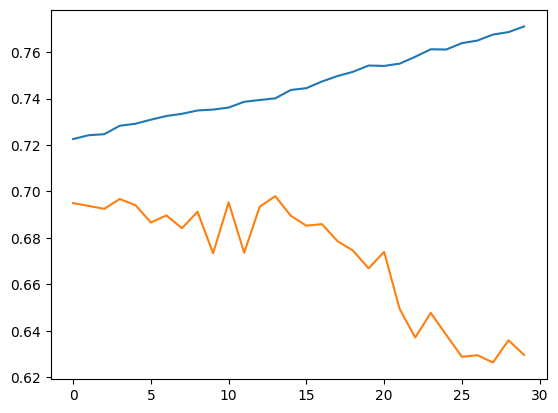

In [63]:
plt.plot(h['acc'])
plt.plot(h['val_acc'])
plt.show()

In [104]:
name = "Ramya"
test_name = name.lower()

seq = [vocab[i] for i in test_name]

x_test = pad_sequences([seq],10)
x_test


array([[ 0,  0,  0,  0,  0, 18,  1, 13, 25,  1]], dtype=int32)

In [105]:
y_pred = my_model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


In [106]:
if y_pred < 0.5:
    print("Given name is a Female")
else:
    print("Given name is a Male")

Given name is a Female


## The End !!